# FLIGHT FARE PREDICTION


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("Flight_Fare.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
data.shape

(10683, 11)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#drop null values
data=data.dropna()

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data=data.drop(columns=["Route","Additional_Info"],axis=1)

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [12]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648
10682,Air India,9/05/2019,Delhi,Cochin,10:55,19:15,8h 20m,2 stops,11753


In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

#### Encoding


In [14]:
data=pd.get_dummies(data,columns=["Destination","Source"])

In [15]:
data

,Airline,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,3897,False,False,False,False,False,True,True,False,False,False,False
1,Air India,1/05/2019,05:50,13:15,7h 25m,2 stops,7662,True,False,False,False,False,False,False,False,False,True,False
2,Jet Airways,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,13882,False,True,False,False,False,False,False,False,True,False,False
3,IndiGo,12/05/2019,18:05,23:30,5h 25m,1 stop,6218,True,False,False,False,False,False,False,False,False,True,False
4,IndiGo,01/03/2019,16:50,21:35,4h 45m,1 stop,13302,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,19:55,22:25,2h 30m,non-stop,4107,True,False,False,False,False,False,False,False,False,True,False
10679,Air India,27/04/2019,20:45,23:20,2h 35m,non-stop,4145,True,False,False,False,False,False,False,False,False,True,False
10680,Jet Airways,27/04/2019,08:20,11:20,3h,non-stop,7229,False,False,True,False,False,False,True,False,False,False,False
10681,Vistara,01/03/2019,11:30,14:10,2h 40m,non-stop,12648,False,False,False,False,False,True,True,False,False,False,False


In [19]:
data["Total_Stops"]=data["Total_Stops"].str.extract("(\d+)")
data["Total_Stops"]=data["Total_Stops"].fillna(0)

In [22]:
data["Total_Stops"]=data["Total_Stops"].astype(int)

In [23]:
data


,Airline,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,False,False,False,False,False,True,True,False,False,False,False
1,Air India,1/05/2019,05:50,13:15,7h 25m,2,7662,True,False,False,False,False,False,False,False,False,True,False
2,Jet Airways,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,False,True,False,False,False,False,False,False,True,False,False
3,IndiGo,12/05/2019,18:05,23:30,5h 25m,1,6218,True,False,False,False,False,False,False,False,False,True,False
4,IndiGo,01/03/2019,16:50,21:35,4h 45m,1,13302,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,19:55,22:25,2h 30m,0,4107,True,False,False,False,False,False,False,False,False,True,False
10679,Air India,27/04/2019,20:45,23:20,2h 35m,0,4145,True,False,False,False,False,False,False,False,False,True,False
10680,Jet Airways,27/04/2019,08:20,11:20,3h,0,7229,False,False,True,False,False,False,True,False,False,False,False
10681,Vistara,01/03/2019,11:30,14:10,2h 40m,0,12648,False,False,False,False,False,True,True,False,False,False,False


In [25]:
data=pd.get_dummies(data,columns=["Airline"])

In [26]:
data

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,05:50,13:15,7h 25m,2,7662,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,18:05,23:30,5h 25m,1,6218,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,16:50,21:35,4h 45m,1,13302,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,0,4107,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10679,27/04/2019,20:45,23:20,2h 35m,0,4145,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10680,27/04/2019,08:20,11:20,3h,0,7229,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
10681,01/03/2019,11:30,14:10,2h 40m,0,12648,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


#### Conversion Of Date and Time features into numerical

In [28]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y")

In [32]:
data["Journey_Date"]=pd.to_datetime(data["Date_of_Journey"]).dt.day

In [34]:
data["Journey_Month"]=pd.to_datetime(data["Date_of_Journey"]).dt.month

In [38]:
data=data.drop(columns=["Date_of_Journey"])

In [39]:
data=data.drop(columns=["Arrival_Time"])

In [43]:
data["Dep_Time"]=pd.to_datetime(data["Dep_Time"],format="%H:%M")

In [45]:
data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute


In [47]:
data=data.drop(columns=["Dep_Time"])

In [50]:
data["Duration_hour"]=data["Duration"].str.extract(r'(\d+)h')

In [51]:
data["Duration_minutes"]=data["Duration"].str.extract(r'(\d+)m')

In [53]:
data["Duration_hour"].fillna(0,inplace=True)
data["Duration_minutes"].fillna(0,inplace=True)

In [57]:
data["Duration_hour"]=data["Duration_hour"].astype(int)
data["Duration_minutes"]=data["Duration_minutes"].astype(int)

In [58]:
#lets combine hours and minutes duration time into a single column as total minutes
data["Total_Duration_mins"]=data["Duration_hour"] * 60 + data["Duration_minutes"]

In [61]:
data=data.drop(columns=["Duration","Duration_hour","Duration_minutes"])

In [86]:
data

,Total_Stops,Price,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_Date,Journey_Month,Dep_hour,Dep_minute,Total_Duration_mins
0,0,3897,False,False,False,False,False,True,True,False,...,False,False,False,False,False,24,3,22,20,170
1,2,7662,True,False,False,False,False,False,False,False,...,False,False,False,False,False,1,5,5,50,445
2,2,13882,False,True,False,False,False,False,False,False,...,False,False,False,False,False,9,6,9,25,1140
3,1,6218,True,False,False,False,False,False,False,False,...,False,False,False,False,False,12,5,18,5,325
4,1,13302,False,False,False,False,False,True,True,False,...,False,False,False,False,False,1,3,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,True,False,False,False,False,False,False,False,...,False,False,False,False,False,9,4,19,55,150
10679,0,4145,True,False,False,False,False,False,False,False,...,False,False,False,False,False,27,4,20,45,155
10680,0,7229,False,False,True,False,False,False,True,False,...,False,False,False,False,False,27,4,8,20,180
10681,0,12648,False,False,False,False,False,True,True,False,...,False,False,False,True,False,1,3,11,30,160


In [87]:
data.dtypes

Total_Stops                                  int32
Price                                        int64
Destination_Banglore                          bool
Destination_Cochin                            bool
Destination_Delhi                             bool
Destination_Hyderabad                         bool
Destination_Kolkata                           bool
Destination_New Delhi                         bool
Source_Banglore                               bool
Source_Chennai                                bool
Source_Delhi                                  bool
Source_Kolkata                                bool
Source_Mumbai                                 bool
Airline_Air Asia                              bool
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers      

#### Outlier Check

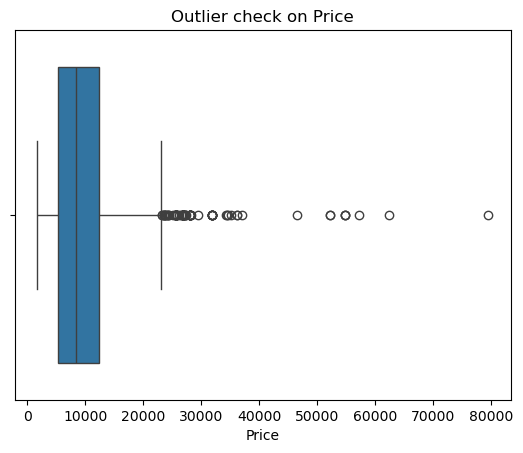

In [65]:
#outlier check on our target column "Price"
sns.boxplot(x=data["Price"])
plt.title("Outlier check on Price")
plt.show()

In [66]:
#winsorize method
from scipy.stats.mstats import winsorize
winsorize(data["Price"],limits=[0.05,0.05],inplace=True)

masked_array(data=[ 3897,  7662, 13882, ...,  7229, 12648, 11753],
             mask=False,
       fill_value=999999,
            dtype=int64)

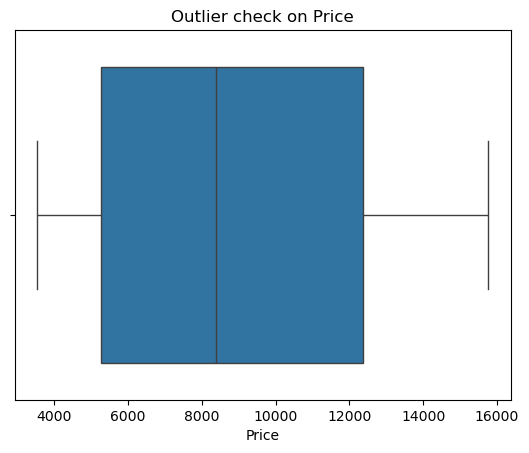

In [67]:
sns.boxplot(x=data["Price"])
plt.title("Outlier check on Price")
plt.show()

In [83]:
data.dtypes

Total_Stops                                  int32
Price                                        int64
Destination_Banglore                          bool
Destination_Cochin                            bool
Destination_Delhi                             bool
Destination_Hyderabad                         bool
Destination_Kolkata                           bool
Destination_New Delhi                         bool
Source_Banglore                               bool
Source_Chennai                                bool
Source_Delhi                                  bool
Source_Kolkata                                bool
Source_Mumbai                                 bool
Airline_Air Asia                              bool
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers      

In [89]:
from sklearn.preprocessing import StandardScaler


num_features = ["Total_Stops", "Journey_Date", "Journey_Month", "Dep_hour", 
                "Dep_minute", "Total_Duration_mins"]


scaler = StandardScaler()

data[num_features] = scaler.fit_transform(data[num_features])


In [97]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data["Price_Scaled"] = scaler.fit_transform(data[["Price"]])


In [98]:
data

,Total_Stops,Price,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_Date,Journey_Month,Dep_hour,Dep_minute,Total_Duration_mins,Price_Scaled
0,-1.220666,3897,False,False,False,False,False,True,True,False,...,False,False,False,False,1.237288,-1.467402,1.654154,-0.234950,-0.931498,-0.630637
1,1.741432,7662,True,False,False,False,False,False,False,False,...,False,False,False,False,-1.475307,0.250289,-1.303113,1.363607,-0.389953,-0.100056
2,1.741432,13882,False,True,False,False,False,False,False,False,...,False,False,False,False,-0.531796,1.109135,-0.607286,0.031476,0.978679,0.776494
3,0.260383,6218,True,False,False,False,False,False,False,False,...,False,False,False,False,-0.177979,0.250289,0.958326,-1.034229,-0.626263,-0.303551
4,0.260383,13302,False,False,False,False,False,True,True,False,...,False,False,False,False,-1.475307,-1.467402,0.610412,1.363607,-0.705034,0.694758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.220666,4107,True,False,False,False,False,False,False,False,...,False,False,False,False,-0.531796,-0.608557,1.132283,1.630034,-0.970883,-0.601043
10679,-1.220666,4145,True,False,False,False,False,False,False,False,...,False,False,False,False,1.591104,-0.608557,1.306240,1.097181,-0.961037,-0.595688
10680,-1.220666,7229,False,False,True,False,False,False,True,False,...,False,False,False,False,1.591104,-0.608557,-0.781243,-0.234950,-0.911805,-0.161077
10681,-1.220666,12648,False,False,False,False,False,True,True,False,...,False,False,True,False,-1.475307,-1.467402,-0.259372,0.297903,-0.951190,0.602593


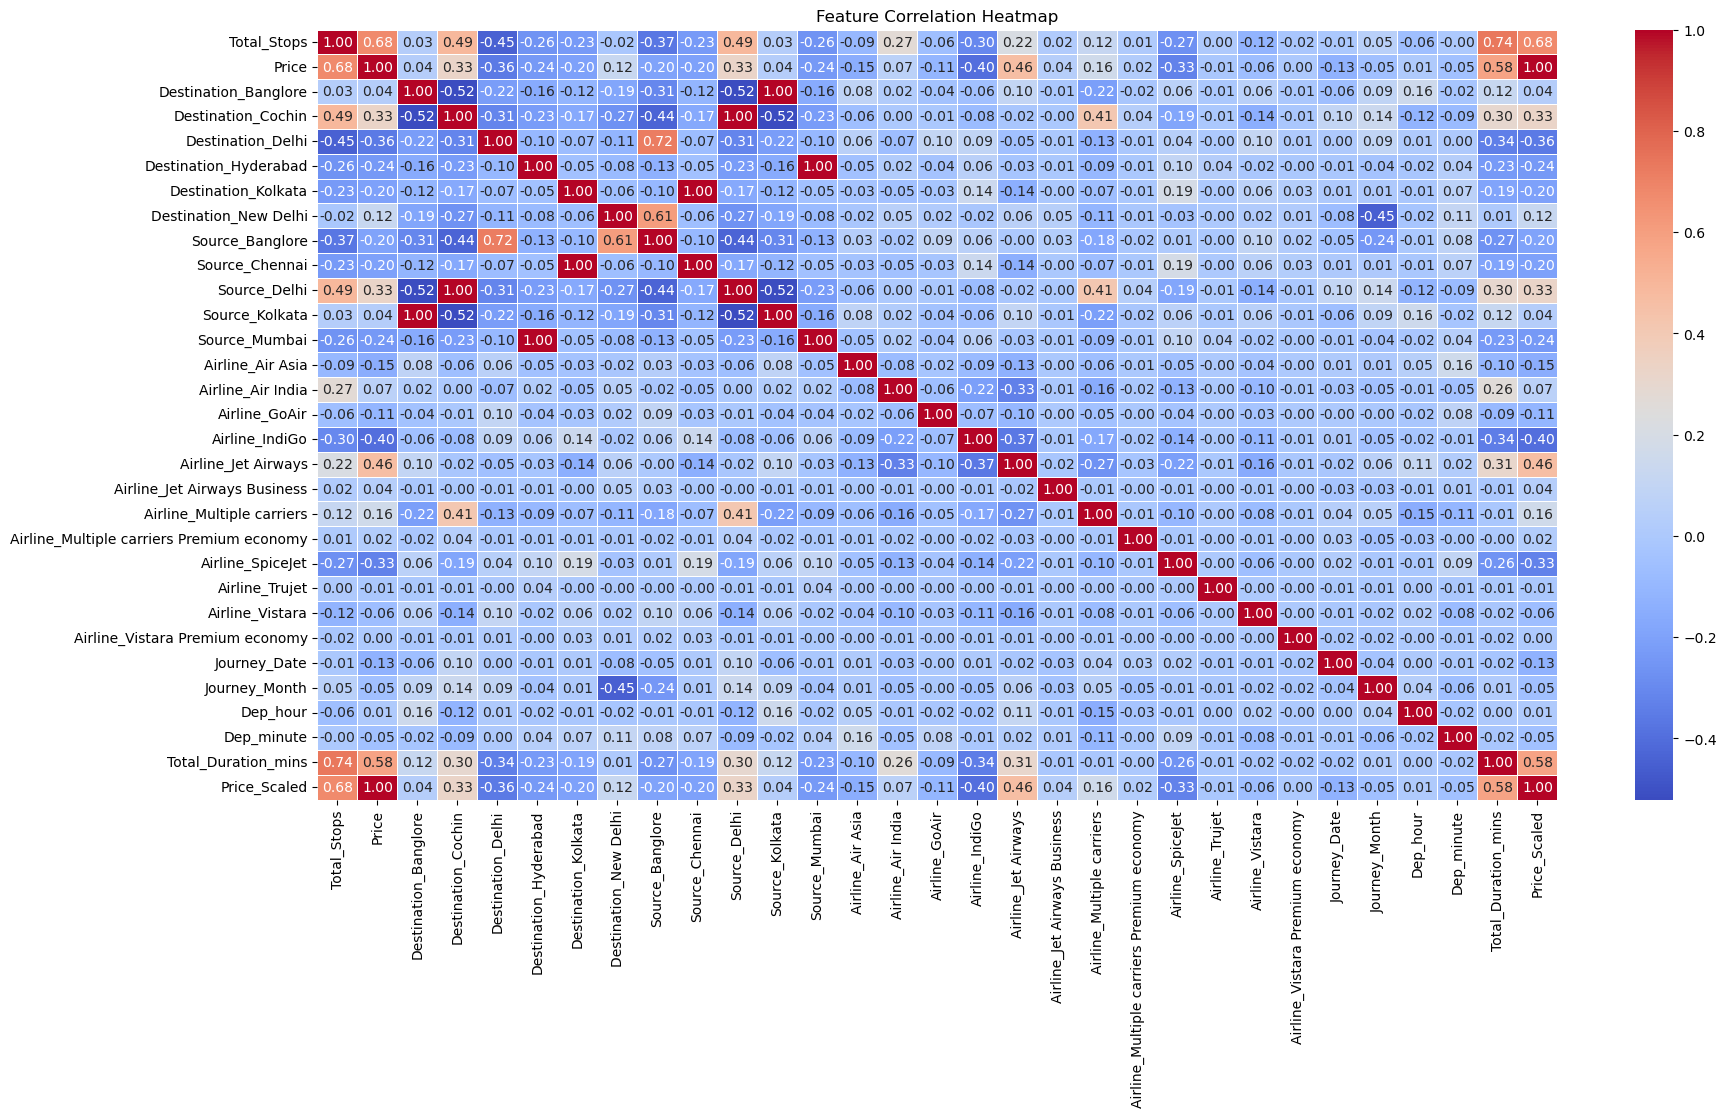

Price                                        1.000000
Price_Scaled                                 1.000000
Total_Stops                                  0.675742
Total_Duration_mins                          0.580119
Airline_Jet Airways                          0.460673
Airline_IndiGo                               0.401683
Destination_Delhi                            0.355003
Source_Delhi                                 0.325940
Destination_Cochin                           0.325940
Airline_SpiceJet                             0.325382
Destination_Hyderabad                        0.239240
Source_Mumbai                                0.239240
Source_Chennai                               0.204494
Destination_Kolkata                          0.204494
Source_Banglore                              0.199341
Airline_Multiple carriers                    0.162380
Airline_Air Asia                             0.149611
Journey_Date                                 0.125316
Destination_New Delhi       

In [117]:
correlation_matrix = data.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features highly correlated with 'Price'
important_features = correlation_matrix["Price"].abs().sort_values(ascending=False)
print(important_features)

### MODEL TRAINING

In [118]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=["Price","Price_Scaled"],axis=1)
y=data["Price_Scaled"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### LINEAR REGRESSION MODEL

In [119]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [120]:
l_pred=l_model.predict(x_test)

In [121]:
from sklearn.metrics import r2_score
l_r2_score=r2_score(l_pred,y_test)
print("Linear regression model r2 score:",l_r2_score)

Linear regression model r2 score: 0.502946940535314


### KNN REGRESSION MODEL

In [127]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [129]:
knn_pred=knn.predict(x_test)

In [132]:
knn_r2=r2_score(knn_pred,y_test)
print("KNN regression model r2 score:",knn_r2)

KNN regression model r2 score: 0.7561816854943244


### RANDOM FOREST REGRESSION MODEL

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [124]:
rf_pred=rf_model.predict(x_test)

In [138]:
rf_r2_score=r2_score(rf_pred,y_test)
print("RF regression model r2 score:",rf_r2_score)

RF regression model r2 score: 0.7870463702620801


### XGB REGRESSION MODEL

In [136]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=100,random_state=42)
xgb.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [137]:
xgb_pred=xgb.predict(x_test)


In [140]:
xgb_r2_score=r2_score(xgb_pred,y_test)
print("XGB regression model r2 score:",xgb_r2_score)

XGB regression model r2 score: 0.8324689864070172


# ** Flight Fare Prediction: Data Analysis & Model Comparison Report**

## **1. Introduction**
This report presents an analysis of flight fare prediction using different machine learning models. The dataset was processed, explored, and tested with various regression models to identify the most accurate prediction method.

---

## **2. Data Preprocessing**
### **2.1 Handling Missing Values**
- Missing values were checked and handled appropriately.

### **2.2 Feature Engineering**
- Extracted numerical values from the `Total_Stops` column.
- Transformed `Duration` into hours and minutes.
- Converted categorical features (`Airline`, `Source`, `Destination`) using One-Hot Encoding.
- Scaled numerical features using **RobustScaler** for `Price` and other features.

### **2.3 Outlier Treatment**
- Outliers in `Price` were handled using the **Winsorization method** to reduce their impact on the model.

---

## **3. Exploratory Data Analysis (EDA)**
### **3.1 Correlation Analysis**
- A heatmap of feature correlation showed that `Total_Stops`, `Duration_Hours`, and `Airline` had the strongest correlation with `Price`.


---

## **4. Model Training & Evaluation**
### **4.1 Models Tested**
| Model | R2 Score |
|--------|-----------|
| Linear Regression | 0.50 |
| K-Nearest Neighbors (KNN) | 0.73 |
| Random Forest (RF) | 0.78 |
| XGBoost (XGB) | 0.83 |

### **4.2 Performance Metrics**
- **Linear Regression** had poor performance due to non-linearity in the data.
- **KNN** performed better but was still sensitive to noise.
- **Random Forest (RF)** improved the accuracy by capturing more complex patterns.
- **XGBoost (XGB) provided the highest accuracy, with an R² score of 0.83.**

---

## **5. Conclusion & Recommendations**
- **Best Model:** XGBoost (**R² = 0.83**), offering the highest accuracy.
- **Key Features:** `Total_Stops`, `Duration_Hours`, `Airline`, and `Source` were the most influential.

---
